In [274]:
from typing import Tuple, List
import numpy as np
import matplotlib.pyplot as plt
import os

In [285]:
import tensorflow as tf

def create_mlp_model(input_shape:Tuple[int, int], 
                     layer_number:int, 
                     neuron_number:List[int], 
                     activation:str|None="relu",
                     loss:str|None = "mae",
                     optimizer:str|None="adam") -> tf.keras.Model:

    """Creates a simple MLP regression model with 3-layers."""
    print(loss)

    layers = [tf.keras.layers.Dense(neuron_number[i], activation=activation) for i in range(layer_number)]
    layers.insert(0, tf.keras.layers.InputLayer(input_shape=input_shape))
    layers.insert(1, tf.keras.layers.Flatten())
    layers.append(tf.keras.layers.Dense(5, activation="softmax"))
    # layers.append(tf.keras.layers.Maximum())

    model = tf.keras.Sequential(layers)
    model.compile(
        loss=loss,
        optimizer=optimizer,
        metrics=["acc"]
    )

    return model

In [300]:
NUMBER_OF_TRAINING_DATA = 10
EPOCHS = 50

TRAINING_PATH = "../data_collection/datasets/training"
TEST_PATH = "../data_collection/datasets/test"

x_training = np.load(os.path.join(TRAINING_PATH, "class", "features.npy"), allow_pickle=True)
y_training = np.load(os.path.join(TRAINING_PATH, "class", "labels.npy"), allow_pickle=True)  


INPUT_DIM = x_training.shape[1:]

x_training = tf.convert_to_tensor(x_training.astype('float32'))
y_training = tf.convert_to_tensor(y_training.astype('int32'))
# y_training = tf.keras.utils.to_categorical(y_training, num_classes=5)

model = create_mlp_model(INPUT_DIM, 5, [1024, 512, 256, 128, 64], "relu", "sparse_categorical_crossentropy", "adam")

sparse_categorical_crossentropy


In [298]:
print(y_training)
print(np.unique(y_training))
list(map(lambda x: len([i for i in y_training if i == x]), range(5)))

tf.Tensor([3 0 4 ... 2 2 2], shape=(1578,), dtype=int32)
[0 1 2 3 4]


[187, 211, 731, 215, 234]

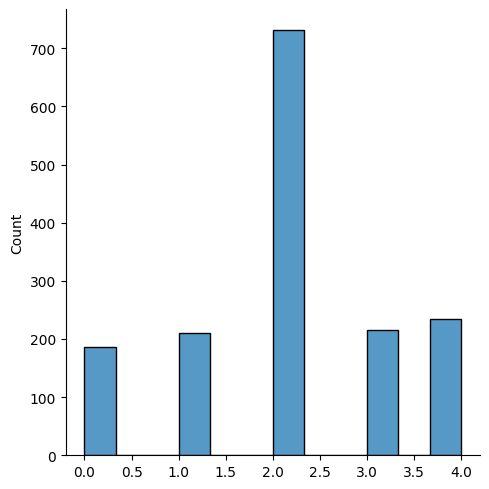

In [299]:
import seaborn as sns

sns.displot(y_training)

In [289]:
import platform
print(platform.platform())
tf.config.list_physical_devices('GPU')

macOS-13.3.1-arm64-arm-64bit


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [301]:
## model training 
history = model.fit(x_training, y_training, epochs=EPOCHS, batch_size=36, verbose=1, validation_split=0.15)

Epoch 1/50
38/38 [==============================] - 2s 34ms/step - loss: 89408282624.0000 - acc: 0.2968 - val_loss: 333731561472.0000 - val_acc: 0.4219
Epoch 2/50
38/38 [==============================] - 0s 10ms/step - loss: 31040536576.0000 - acc: 0.3028 - val_loss: 195213328384.0000 - val_acc: 0.1730
Epoch 3/50
38/38 [==============================] - 0s 10ms/step - loss: 23147001856.0000 - acc: 0.3214 - val_loss: 70545883136.0000 - val_acc: 0.3882
Epoch 4/50
38/38 [==============================] - 0s 9ms/step - loss: 24228517888.0000 - acc: 0.3557 - val_loss: 130350145536.0000 - val_acc: 0.1646
Epoch 5/50
38/38 [==============================] - 0s 10ms/step - loss: 17205831680.0000 - acc: 0.3207 - val_loss: 91519369216.0000 - val_acc: 0.1730
Epoch 6/50
38/38 [==============================] - 0s 9ms/step - loss: 24991414272.0000 - acc: 0.2998 - val_loss: 227192422400.0000 - val_acc: 0.4304
Epoch 7/50
38/38 [==============================] - 0s 9ms/step - loss: 47314022400.0000 - a

KeyboardInterrupt: 

In [291]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_31 (Flatten)        (None, 828)               0         
                                                                 
 dense_210 (Dense)           (None, 1024)              848896    
                                                                 
 dense_211 (Dense)           (None, 512)               524800    
                                                                 
 dense_212 (Dense)           (None, 256)               131328    
                                                                 
 dense_213 (Dense)           (None, 128)               32896     
                                                                 
 dense_214 (Dense)           (None, 64)                8256      
                                                                 
 dense_215 (Dense)           (None, 5)               

In [295]:
accuracy = history.history["acc"]
val_accuracy = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

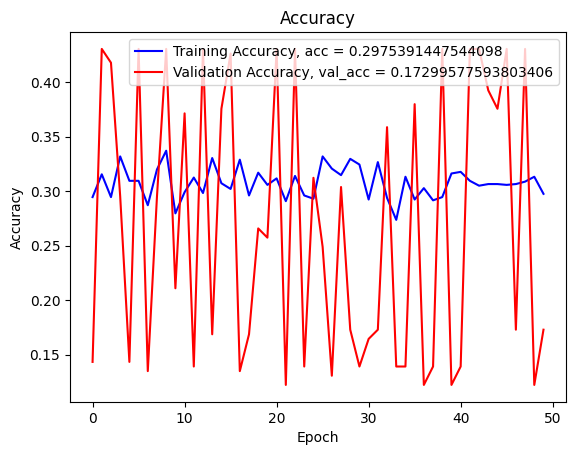

In [296]:
plt.plot(range(EPOCHS), accuracy, "b", label = f"Training Accuracy, acc = {accuracy[-1]}")
plt.plot(range(EPOCHS), val_accuracy, "-r", label = f"Validation Accuracy, val_acc = {val_accuracy[-1]}")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

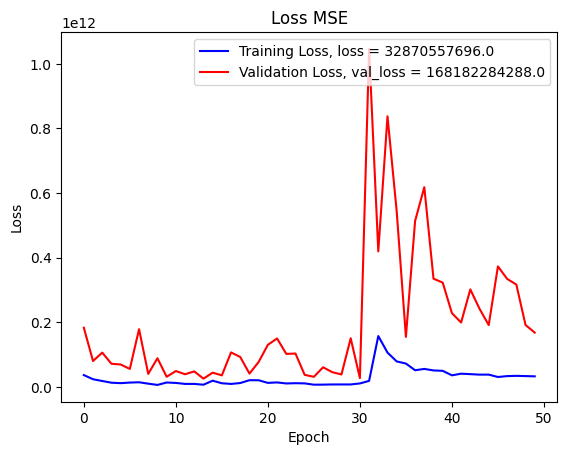

In [297]:
plt.plot(range(EPOCHS), loss, "b", label = f"Training Loss, loss = {loss[-1]}")
plt.plot(range(EPOCHS), val_loss, "-r", label = f"Validation Loss, val_loss = {val_loss[-1]}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss MSE")
plt.show()

In [195]:
x_test = np.load(os.path.join(TEST_PATH, "class", "features.npy"), allow_pickle=True)
y_test = np.load(os.path.join(TEST_PATH, "class", "labels.npy"), allow_pickle=True)  

x_test = tf.convert_to_tensor(x_test.astype('float32'))
y_test = tf.convert_to_tensor(y_test.astype('float32'))

In [156]:
y_test

<tf.Tensor: shape=(395,), dtype=float32, numpy=
array([3., 0., 3., 3., 0., 1., 4., 2., 1., 4., 0., 1., 1., 0., 0., 4., 0.,
       0., 2., 2., 3., 0., 3., 0., 3., 1., 2., 3., 1., 2., 2., 0., 1., 3.,
       2., 4., 2., 0., 2., 1., 2., 2., 2., 2., 2., 2., 0., 0., 1., 0., 2.,
       2., 0., 2., 0., 4., 2., 2., 1., 4., 3., 2., 1., 2., 1., 1., 2., 2.,
       2., 2., 3., 2., 3., 3., 2., 2., 1., 1., 1., 4., 4., 3., 4., 2., 4.,
       2., 2., 3., 1., 2., 3., 0., 2., 4., 4., 2., 2., 2., 1., 2., 2., 2.,
       4., 1., 2., 4., 1., 4., 2., 3., 2., 1., 2., 2., 1., 2., 0., 2., 2.,
       2., 2., 2., 3., 0., 2., 1., 4., 2., 2., 2., 2., 2., 2., 3., 1., 3.,
       2., 4., 3., 2., 1., 0., 3., 0., 1., 2., 0., 3., 1., 0., 4., 2., 2.,
       2., 3., 2., 2., 2., 2., 2., 1., 3., 3., 2., 2., 2., 2., 2., 1., 2.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 4., 1., 4., 4., 0., 4.,
       4., 1., 2., 2., 0., 2., 4., 2., 0., 2., 0., 0., 4., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 2., 2., 3., 2., 2., 2

In [157]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 8ms/step - loss: 28988448768.0000 - acc: 0.1342


[28988448768.0, 0.13417720794677734]

In [158]:
from sklearn.metrics import classification_report, confusion_matrix

In [168]:
#Predict
y_prediction = model.predict(x_test)

y_prediction = np.argmax (y_prediction, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction , normalize='pred')
print(result)

13/13 [==============================] - 0s 4ms/step
[[0.10869565 0.         0.2        0.11003236 0.05714286]
 [0.08695652 0.         0.6        0.13268608 0.25714286]
 [0.56521739 0.         0.2        0.48543689 0.4       ]
 [0.04347826 0.         0.         0.13915858 0.17142857]
 [0.19565217 0.         0.         0.13268608 0.11428571]]


In [169]:
np.unique(y_prediction, return_counts=True)

(array([0, 2, 3, 4]), array([ 46,   5, 309,  35]))

In [170]:
y_prediction.shape

(395,)

In [175]:
y_prediction[200:300]

array([0, 0, 0, 0, 0, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 0, 3, 0, 3, 3, 3])

In [34]:
np.unique(y_training, return_counts=True)

(array([2.], dtype=float32), array([1578]))